In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from seaborn import FacetGrid

In [2]:
pre_df = pd.read_csv('dane/AviationData.csv', encoding='ISO-8859-1', dtype={6: str, 7: str, 28: str})
df = pre_df[pre_df['Country'] == 'United States']

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.drop(columns=["Latitude", "Registration.Number", "Make","Longitude", "Schedule", "FAR.Description", "Air.carrier", "Airport.Code", "Airport.Name", "Aircraft.Category", "Event.Id", "Accident.Number", "Publication.Date","Report.Status"], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18656\3704500817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Latitude", "Registration.Number", "Make","Longitude", "Schedule", "FAR.Description", "Air.carrier", "Airport.Code", "Airport.Name", "Aircraft.Category", "Event.Id", "Accident.Number", "Publication.Date","Report.Status"], inplace=True)


In [5]:
for k in df.keys():
    tmpNum = df.columns.get_loc(k)
    print(tmpNum,k)

0 Investigation.Type
1 Event.Date
2 Location
3 Country
4 Injury.Severity
5 Aircraft.damage
6 Model
7 Amateur.Built
8 Number.of.Engines
9 Engine.Type
10 Purpose.of.flight
11 Total.Fatal.Injuries
12 Total.Serious.Injuries
13 Total.Minor.Injuries
14 Total.Uninjured
15 Weather.Condition
16 Broad.phase.of.flight


In [27]:
good_weather_acc = df.loc[df['Weather.Condition'] == 'VMC'][df['Investigation.Type'] == "Accident"].count()
good_weather_inc = df.loc[df['Weather.Condition'] == 'VMC'][df['Investigation.Type'] == "Incident"].count()
bad_weather_acc = df.loc[df['Weather.Condition'] == 'IMC'][df['Investigation.Type'] == "Accident"].count()
bad_weather_inc = df.loc[df['Weather.Condition'] == 'IMC'][df['Investigation.Type'] == "Incident"].count()

var_gwa = pd.Series(good_weather_acc, name = 'Good Weather Acc')
var_gwi = pd.Series(good_weather_inc, name = 'Good Weather Inc')
var_bwa = pd.Series(bad_weather_acc, name = 'Bad Weather Acc')
var_bwi = pd.Series(bad_weather_inc, name = 'Bad Weather Inc')

df1 = pd.DataFrame({'Good Weather Acc': var_gwa,
                   'Good Weather Inc': var_gwi,
                   'Bad Weather Acc': var_bwa,
                   'Bad Weather Inc' : var_bwi})

df2 = pd.DataFrame(df1, df['Event.Date'])

investigation_type = df1.iloc[0]
investigation_type

C:\Users\User\AppData\Local\Temp\ipykernel_18656\3379490496.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_weather_acc = df.loc[df['Weather.Condition'] == 'VMC'][df['Investigation.Type'] == "Accident"].count()
C:\Users\User\AppData\Local\Temp\ipykernel_18656\3379490496.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_weather_inc = df.loc[df['Weather.Condition'] == 'VMC'][df['Investigation.Type'] == "Incident"].count()
C:\Users\User\AppData\Local\Temp\ipykernel_18656\3379490496.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bad_weather_acc = df.loc[df['Weather.Condition'] == 'IMC'][df['Investigation.Type'] == "Accident"].count()
C:\Users\User\AppData\Local\Temp\ipykernel_18656\3379490496.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bad_weather_inc = df.loc[df['Weather.Condition'] == 'IMC'][df['Investigation.Type'] == "Incident"].co

Good Weather Acc    73342
Good Weather Inc     1975
Bad Weather Acc      5390
Bad Weather Inc       228
Name: Investigation.Type, dtype: int64

In [24]:
var_gwi

Investigation.Type        True
Event.Date                True
Location                  True
Country                   True
Injury.Severity           True
Aircraft.damage           True
Model                     True
Amateur.Built             True
Number.of.Engines         True
Engine.Type               True
Purpose.of.flight         True
Total.Fatal.Injuries      True
Total.Serious.Injuries    True
Total.Minor.Injuries      True
Total.Uninjured           True
Weather.Condition         True
Broad.phase.of.flight     True
Name: Good Weather Inc, dtype: bool

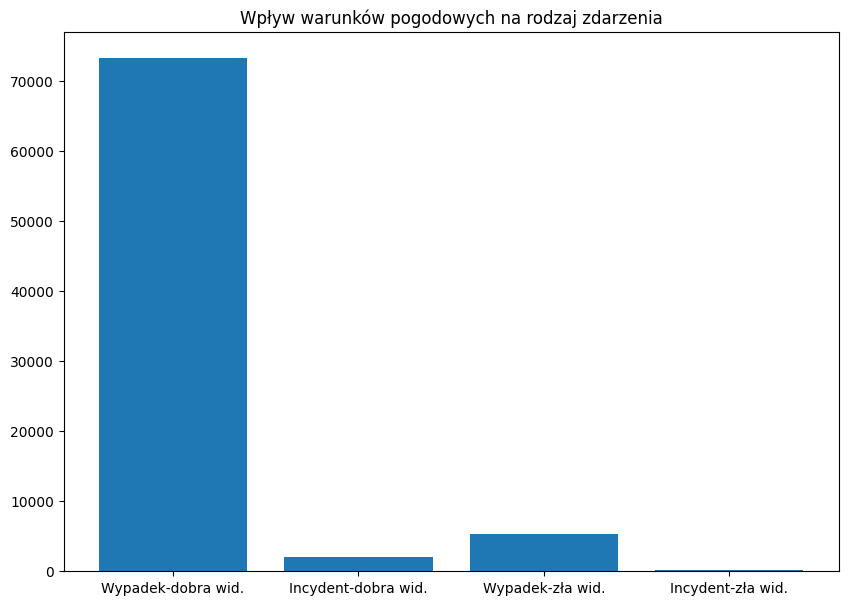

In [7]:
heights = [73342, 1975, 5390, 228]
bars = ['Wypadek-dobra wid.', 'Incydent-dobra wid.', 'Wypadek-zła wid.', 'Incydent-zła wid.']
y_pos = range(len(bars))

fig = plt.figure(figsize =(10, 7))
plt.bar(bars, heights) #kolor
plt.title('Wpływ warunków pogodowych na rodzaj zdarzenia')
plt.show()

In [42]:
accidents = df.loc[df['Investigation.Type'] == "Accident"].count()
incidents = df.loc[df['Investigation.Type'] == "Incident"].count()

var_accidents = pd.Series(accidents, name = 'Accidents')
var_incidents = pd.Series(incidents, name = 'Incidents')

df3 = pd.concat([df,var_accidents, var_incidents], axis=1)
df3

#ts = df2.set_index('Event.Date')
#ts

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Accidents,Incidents
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,NaN,NaN
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,NaN,NaN
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,NaN,NaN
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,NaN,NaN
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total.Serious.Injuries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68921.0,1952.0
Total.Minor.Injuries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69551.0,1968.0
Total.Uninjured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74911.0,2332.0
Weather.Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79345.0,2258.0


In [45]:
df3['Event.Date'] = pd.to_datetime(df3['Event.Date'])

In [46]:
df3.info(())

<class 'pandas.core.frame.DataFrame'>
Index: 82265 entries, 0 to Broad.phase.of.flight
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      82248 non-null  object        
 1   Event.Date              82248 non-null  datetime64[ns]
 2   Location                82237 non-null  object        
 3   Country                 82248 non-null  object        
 4   Injury.Severity         82140 non-null  object        
 5   Aircraft.damage         80269 non-null  object        
 6   Model                   82210 non-null  object        
 7   Amateur.Built           82227 non-null  object        
 8   Number.of.Engines       80373 non-null  float64       
 9   Engine.Type             79206 non-null  object        
 10  Purpose.of.flight       79819 non-null  object        
 11  Total.Fatal.Injuries    71594 non-null  float64       
 12  Total.Serious.Injuries  70873 non-n

In [47]:
df3['year'] = df3['Event.Date'].dt.year

In [12]:
#grouped = df3.groupby(['year'])

In [48]:
df4 = df3.groupby(['year']).count()
df4

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Accidents,Incidents
year,,,,,,,,,,,,,,,,,,,
1948.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1962.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1974.0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0
1977.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1979.0,2,2,2,2,2,2,2,2,1,1,1,1,1,1,2,2,2,0,0
1981.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1982.0,3564,3564,3564,3564,3564,3510,3550,3563,3564,3564,3560,3540,3537,3538,3556,3563,3562,0,0
1983.0,3524,3524,3523,3524,3524,3458,3524,3524,3465,3523,3521,3513,3507,3503,3515,3524,3520,0,0
1984.0,3418,3418,3417,3418,3418,3341,3417,3418,3371,3418,3416,3405,3404,3404,3410,3418,3417,0,0


In [52]:
count = len(df3[(df3['Investigation.Type'] == 'Accident')])
count

79906

In [80]:
grouped = df3.groupby(['year','Investigation.Type'])

In [81]:
counts = grouped.size()

In [79]:
df_counts = counts.reset_index(name='count')
df_counts

,year,Investigation.Type,count
0,1948.0,Accident,1
1,1962.0,Accident,1
2,1974.0,Accident,1
3,1977.0,Accident,1
4,1979.0,Accident,2
...,...,...,...
83,2020.0,Incident,6
84,2021.0,Accident,1173
85,2021.0,Incident,8
86,2022.0,Accident,1237


In [57]:
df_counts.set_index('year',inplace=False)

,Investigation.Type,count
year,,
1948.0,Accident,1
1962.0,Accident,1
1974.0,Accident,1
1977.0,Accident,1
1979.0,Accident,2
...,...,...
2020.0,Incident,6
2021.0,Accident,1173
2021.0,Incident,8


In [117]:
df_counts.rename(columns = {'Investigation.Type':'Investigation_Type'}, inplace = True)

In [118]:
acc = df_counts[df_counts['Investigation_Type'] == 'Accident']
inc = df_counts[df_counts['Investigation_Type'] == 'Incident']

In [78]:
acc.set_index('year',inplace=False)
inc.set_index('year',inplace=False)

,Investigation_Type,count
year,,
1982.0,Incident,119
1983.0,Incident,133
1984.0,Incident,128
1985.0,Incident,94
1986.0,Incident,87
1987.0,Incident,105
1988.0,Incident,123
1989.0,Incident,85
1990.0,Incident,61


C:\Users\User\anaconda3new\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3new\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3new\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3new\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

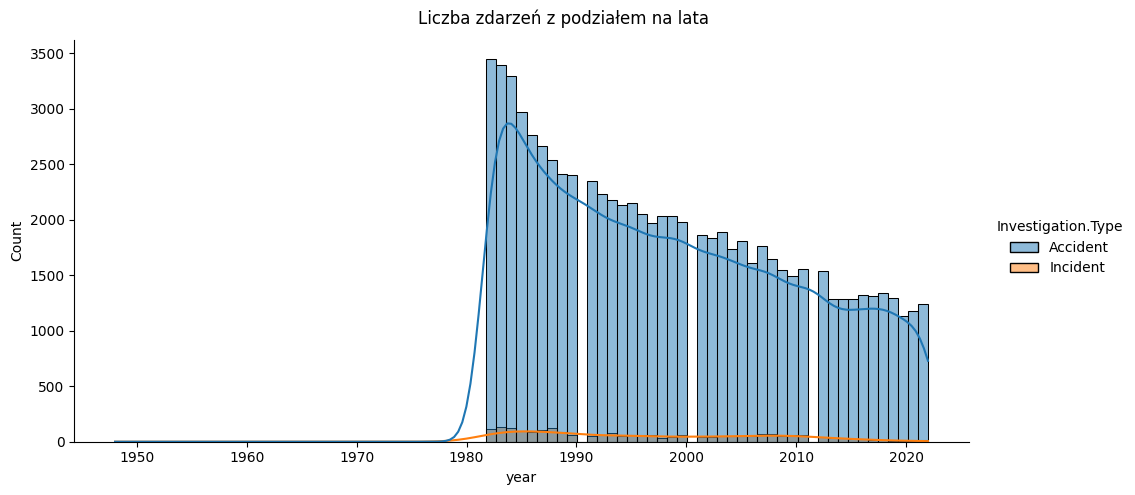

In [150]:
dist = sns.displot(data=df3, x="year", hue='Investigation.Type', kde=True, height=5, aspect=2)
dist.fig.subplots_adjust(top=0.92)
dist.fig.suptitle('Liczba zdarzeń z podziałem na lata')
plt.show()